In [1]:
!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px


In [2]:
plt.style.use('fivethirtyeight')

!pip install fredapi

In [3]:
from fredapi import Fred

pd.set_option('display.max_columns', 500)

In [4]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [5]:
fred_key = '7f2f1a3fe19db48ae44f4a22512bfc4f'

## 1.Create the Fred Object



In [6]:
fred = Fred(api_key=fred_key)

## 2. Search the economic data!

In [7]:
help(fred)

Help on Fred in module fredapi.fred object:

class Fred(builtins.object)
 |  Fred(api_key=None, api_key_file=None, proxies=None)
 |
 |  Methods defined here:
 |
 |  __init__(self, api_key=None, api_key_file=None, proxies=None)
 |      Initialize the Fred class that provides useful functions to query the Fred dataset. You need to specify a valid
 |      API key in one of 3 ways: pass the string via api_key, or set api_key_file to a file with the api key in the
 |      first line, or set the environment variable 'FRED_API_KEY' to the value of your api key.
 |
 |      Parameters
 |      ----------
 |      api_key : str
 |          API key. A free api key can be obtained on the Fred website at http://research.stlouisfed.org/fred2/.
 |      api_key_file : str
 |          Path to a file containing the api key.
 |      proxies : dict
 |          Proxies specifications: a dictionary mapping protocol names (e.g. 'http', 'https') to proxy URLs. If not provided, environment variables 'HTTP_PROXY'

In [8]:
fred.search('S&P', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-30,2025-07-30,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-30 06:57:14-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-30,2025-07-30,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-07-29 08:11:24-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-30,2025-07-30,S&P 500,2015-07-30,2025-07-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-29 19:01:56-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-30,2025-07-30,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-30 06:57:17-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-30,2025-07-30,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-30 07:06:03-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-07-30,2025-07-30,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-07-30,2025-07-30,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-07-30,2025-07-30,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


## 3. Pull Raw Data

In [9]:
sp500 = fred.get_series(series_id='SP500')


<Axes: title={'center': 'S&P500'}>

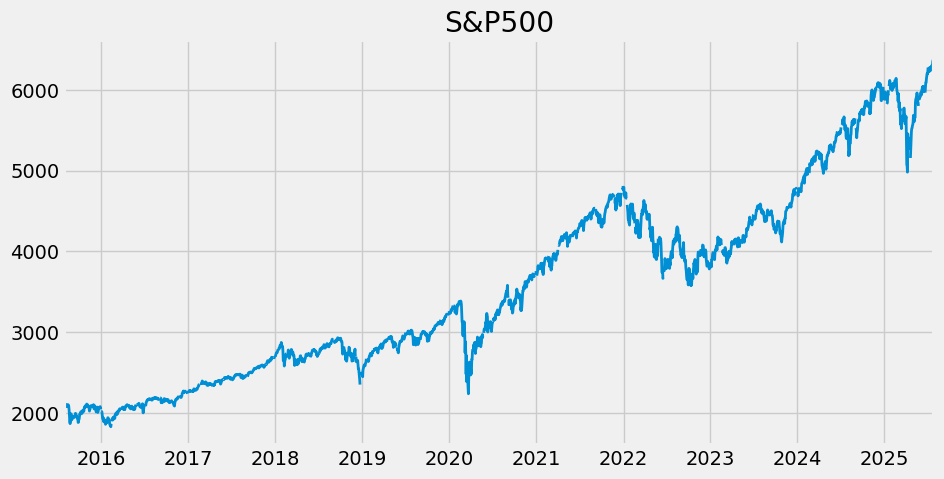

In [10]:
sp500.plot(figsize=(10,5), title='S&P500', lw=2 )

## 4. Pull and Join Multiple Data Series

In [11]:
fred.search('unemployment', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2025-07-30,2025-07-30,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2025-06-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2025-07-15 07:41:39-05:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2025-07-30,2025-07-30,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2025-07-30,2025-07-30,"All Employees, Total Nonfarm",1939-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:49:00-05:00,83,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2025-07-30,2025-07-30,Initial Claims,1967-01-07,2025-07-19,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-07-24 07:33:06-05:00,81,An initial claim is a claim filed by an unempl...
SAHMREALTIME,SAHMREALTIME,2025-07-30,2025-07-30,Real-time Sahm Rule Recession Indicator,1959-12-01,2025-06-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2025-07-03 07:58:02-05:00,80,Sahm Recession Indicator signals the start of ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXFORT5URN,TXFORT5URN,2025-07-30,2025-07-30,"Unemployment Rate in Fort Bend County, TX",1990-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-30 10:36:09-05:00,5,These data come from the Current Population Su...
DESUSS0URN,DESUSS0URN,2025-07-30,2025-07-30,"Unemployment Rate in Sussex County, DE",1990-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-30 10:25:40-05:00,5,These data come from the Current Population Su...
SCICLAIMS,SCICLAIMS,2025-07-30,2025-07-30,Initial Claims in South Carolina,1986-02-15,2025-07-19,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2025-07-25 07:36:07-05:00,5,An initial claim is a claim filed by an unempl...


In [12]:
unrate = fred.get_series('UNRATE')

In [13]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2025-02-01    4.1
2025-03-01    4.2
2025-04-01    4.2
2025-05-01    4.2
2025-06-01    4.1
Length: 930, dtype: float64

<Axes: >

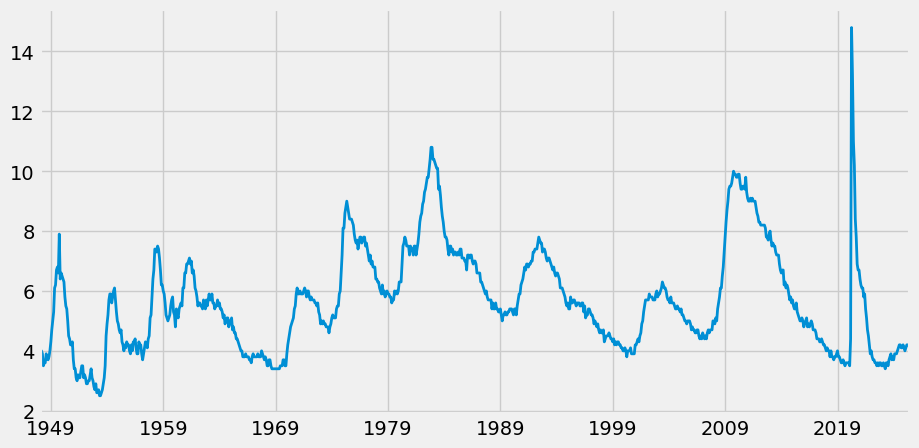

In [14]:
unrate.plot(figsize = (10,5), lw =2)

In [15]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [16]:
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')


In [17]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-30,2025-07-30,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-07-30,2025-07-30,Unemployment Rate - Black or African American,1972-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:48:17-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-07-30,2025-07-30,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:57-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-07-30,2025-07-30,Unemployment Rate in California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:08-05:00,64,None
TXUR,TXUR,2025-07-30,2025-07-30,Unemployment Rate in Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:42-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-07-30,2025-07-30,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2025-07-30,2025-07-30,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:48:16-05:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2025-07-30,2025-07-30,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:48:16-05:00,56,The series comes from the 'Current Population ...
M0892BUSM156SNBR,M0892BUSM156SNBR,2025-07-30,2025-07-30,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...


In [18]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2025-07-30,2025-07-30,Unemployment Rate in California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:08-05:00,64,None
TXUR,TXUR,2025-07-30,2025-07-30,Unemployment Rate in Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:42-05:00,56,None
NYUR,NYUR,2025-07-30,2025-07-30,Unemployment Rate in New York,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:33-05:00,53,None
FLUR,FLUR,2025-07-30,2025-07-30,Unemployment Rate in Florida,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:13-05:00,51,None
PAUR,PAUR,2025-07-30,2025-07-30,Unemployment Rate in Pennsylvania,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:36-05:00,44,None
OHUR,OHUR,2025-07-30,2025-07-30,Unemployment Rate in Ohio,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:34-05:00,41,None
MIUR,MIUR,2025-07-30,2025-07-30,Unemployment Rate in Michigan,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:23-05:00,38,None
ALUR,ALUR,2025-07-30,2025-07-30,Unemployment Rate in Alabama,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:04-05:00,38,None
MAUR,MAUR,2025-07-30,2025-07-30,Unemployment Rate in Massachusetts,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:21-05:00,37,None


In [19]:
# Filter rows where the title contains "Unemployment Rate"
filtered_df = unemp_df[unemp_df['title'].str.contains('Unemployment Rate in', case=False)]

# Initialize list
all_results = []

# Loop only through filtered rows
for myid in filtered_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    #break  # just for testing
print(filtered_df[['title']])  # Check what you're looping through


                                         title
series id                                     
CAUR           Unemployment Rate in California
TXUR                Unemployment Rate in Texas
NYUR             Unemployment Rate in New York
FLUR              Unemployment Rate in Florida
PAUR         Unemployment Rate in Pennsylvania
OHUR                 Unemployment Rate in Ohio
MIUR             Unemployment Rate in Michigan
ALUR              Unemployment Rate in Alabama
MAUR        Unemployment Rate in Massachusetts
NCUR       Unemployment Rate in North Carolina
ILUR             Unemployment Rate in Illinois
NJUR           Unemployment Rate in New Jersey
GAUR              Unemployment Rate in Georgia
COUR             Unemployment Rate in Colorado
AZUR              Unemployment Rate in Arizona
WIUR            Unemployment Rate in Wisconsin
VAUR             Unemployment Rate in Virginia
KYUR             Unemployment Rate in Kentucky
SCUR       Unemployment Rate in South Carolina
NMUR         

In [20]:
uemp_results= pd.concat(all_results, axis=1)

In [21]:
uemp_results.head

<bound method NDFrame.head of             CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.6   8.1   8.1   9.9   6.7  10.6   6.5   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.6   6.5   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.6   6.5   6.6   
1976-04-01   9.0   5.9  10.2   9.5   8.1   7.9   9.8   6.5  10.4   6.3   6.6   
1976-05-01   8.9   6.0  10.2   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2025-02-01   5.4   4.1   4.3   3.6   3.8   4.7   5.4   3.3   4.3   3.7   4.8   
2025-03-01   5.3   4.1   4.2   3.6   3.8   4.8   5.5   3.3   4.4   3.7   4.8   
2025-04-01   5.3   4.1   4.2   3.7   3.9   4.9   5.5   3.3   4.6   3.7   4.8   
2025-05-01   5.3   4.1   4.0   3.7   3.9   4.9   5.4   3.3   4.8   3.7   4.8   
2025-06-01   5.4   4.0   4.0   3.7   4.0   4.9   5.3   3.2   4.8   3.7   4.6   

         

In [22]:
uemp_results.isna().sum()

CAUR    0
TXUR    0
NYUR    0
FLUR    0
PAUR    0
OHUR    0
MIUR    0
ALUR    0
MAUR    0
NCUR    0
ILUR    0
NJUR    0
GAUR    0
COUR    0
AZUR    0
WIUR    0
VAUR    0
KYUR    0
SCUR    0
NMUR    0
MNUR    0
TNUR    0
WAUR    0
MDUR    0
ORUR    0
WVUR    0
NVUR    0
ARUR    0
dtype: int64

In [23]:
px.line(uemp_results)

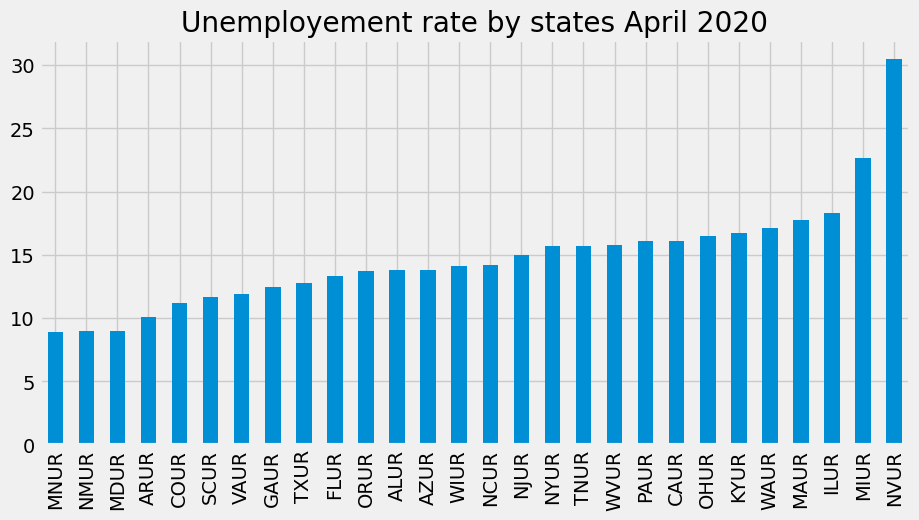

In [24]:
ax= uemp_results.loc[uemp_results.index == '2020-04-01'].T.sort_values('2020-04-01')\
            . plot(kind='bar', figsize=(10,5), title='Unemployement rate by states April 2020')


ax.legend().remove()
plt.show()


In [25]:
id_to_state=filtered_df['title'].str.replace('Unemployment Rate in',' ').to_dict()

In [26]:
uemp_results.columns=[id_to_state[c] for c in uemp_results.columns]

In [131]:
uemp_results.columns


Index(['  California', '  Texas', '  New York', '  Florida', '  Pennsylvania',
       '  Ohio', '  Michigan', '  Alabama', '  Massachusetts',
       '  North Carolina', '  Illinois', '  New Jersey', '  Georgia',
       '  Colorado', '  Arizona', '  Wisconsin', '  Virginia', '  Kentucky',
       '  South Carolina', '  New Mexico', '  Minnesota', '  Tennessee',
       '  Washington', '  Maryland', '  Oregon', '  West Virginia', '  Nevada',
       '  Arkansas'],
      dtype='object')

In [27]:
uemp_results

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas
1976-01-01,9.2,5.8,10.3,9.6,8.1,8.1,9.9,6.7,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.3,5.7,10.2,5.8,6.0,5.6,7.3,8.6,5.8,6.0,8.5,6.5,9.4,7.4,9.2,7.3
1976-04-01,9.0,5.9,10.2,9.5,8.1,7.9,9.8,6.5,10.4,6.3,6.6,10.3,8.2,5.6,10.0,5.7,5.9,5.6,7.1,8.6,5.7,6.0,8.5,6.5,9.3,7.4,9.0,7.2
1976-05-01,8.9,6.0,10.2,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.6,5.8,5.5,7.0,8.6,5.6,5.9,8.5,6.6,9.1,7.4,8.8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,5.4,4.1,4.3,3.6,3.8,4.7,5.4,3.3,4.3,3.7,4.8,4.6,3.6,4.7,3.9,3.2,3.1,5.3,4.2,4.4,3.0,3.7,4.4,3.0,4.5,3.9,5.8,3.6
2025-03-01,5.3,4.1,4.2,3.6,3.8,4.8,5.5,3.3,4.4,3.7,4.8,4.7,3.6,4.8,4.1,3.2,3.2,5.2,4.1,4.3,3.1,3.6,4.4,3.0,4.6,3.8,5.7,3.7
2025-04-01,5.3,4.1,4.2,3.7,3.9,4.9,5.5,3.3,4.6,3.7,4.8,4.8,3.6,4.8,4.1,3.3,3.3,5.2,4.2,4.3,3.2,3.5,4.4,3.1,4.7,3.8,5.6,3.7
2025-05-01,5.3,4.1,4.0,3.7,3.9,4.9,5.4,3.3,4.8,3.7,4.8,4.8,3.5,4.8,4.1,3.3,3.4,5.0,4.1,4.2,3.3,3.5,4.5,3.2,4.8,3.7,5.5,3.7


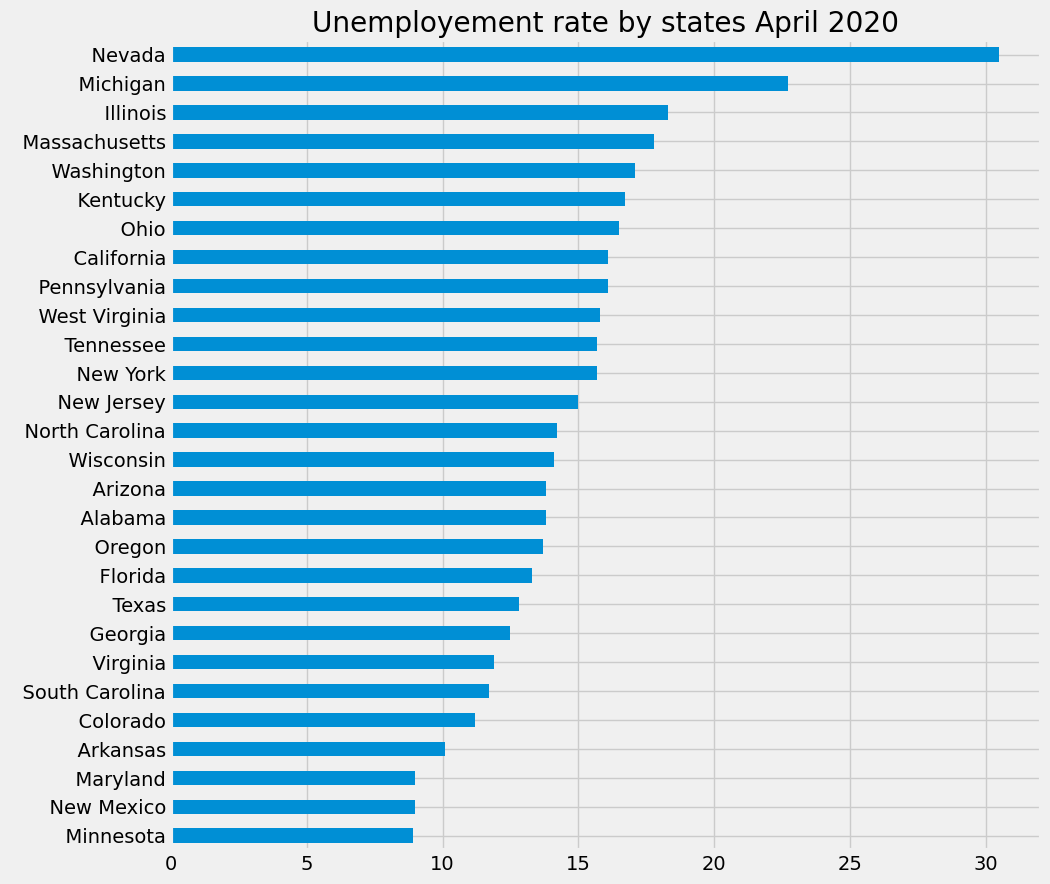

In [28]:
ax= uemp_results.loc[uemp_results.index == '2020-04-01'].T.sort_values('2020-04-01')\
            . plot(kind='barh', figsize=(10,10), title='Unemployement rate by states April 2020')


ax.legend().remove()
plt.show()

## Pull participation rate

In [79]:
part_df=fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df=part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent"')
filtered_part_df = part_df[part_df['title'].str.contains('Labor Force Participation Rate for', case=False)]



In [80]:
filtered_part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2025-07-30,2025-07-30,Labor Force Participation Rate for California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:12-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2025-07-30,2025-07-30,Labor Force Participation Rate for Alabama,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:12-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2025-07-30,2025-07-30,Labor Force Participation Rate for New York,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:17-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2025-07-30,2025-07-30,Labor Force Participation Rate for Michigan,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:15-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2025-07-30,2025-07-30,Labor Force Participation Rate for Mississippi,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:16-05:00,21,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2025-07-30,2025-07-30,Labor Force Participation Rate for Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:19-05:00,20,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2025-07-30,2025-07-30,Labor Force Participation Rate for Florida,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:13-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2025-07-30,2025-07-30,Labor Force Participation Rate for Kentucky,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:15-05:00,20,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2025-07-30,2025-07-30,Labor Force Participation Rate for Ohio,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:18-05:00,14,A state's labor-force participation rate is th...


In [99]:
part_id_to_state = filtered_part_df['title'].str.replace('Labor Force Participation Rate for','', regex=False).str.strip().to_dict()


In [100]:
print(part_id_to_state)

{'LBSSA06': 'California', 'LBSSA01': 'Alabama', 'LBSSA36': 'New York', 'LBSSA26': 'Michigan', 'LBSSA28': 'Mississippi', 'LBSSA48': 'Texas', 'LBSSA12': 'Florida', 'LBSSA21': 'Kentucky', 'LBSSA39': 'Ohio', 'LBSSA55': 'Wisconsin', 'LBSSA42': 'Pennsylvania', 'LBSSA25': 'Massachusetts', 'LBSSA27': 'Minnesota', 'LBSSA24': 'Maryland', 'LBSSA54': 'West Virginia', 'LBSSA47': 'Tennessee', 'LBSSA23': 'Maine', 'LBSSA17': 'Illinois', 'LBSSA37': 'North Carolina', 'LBSSA13': 'Georgia', 'LBSSA22': 'Louisiana', 'LBSSA45': 'South Carolina', 'LBSSA08': 'Colorado', 'LBSSA49': 'Utah', 'LBSSA51': 'Virginia', 'LBSSA18': 'Indiana', 'LBSSA29': 'Missouri', 'LBSSA34': 'New Jersey', 'LBSSA19': 'Iowa', 'LBSSA02': 'Alaska', 'LBSSA53': 'Washington', 'LBSSA04': 'Arizona', 'LBSSA35': 'New Mexico', 'LBSSA16': 'Idaho', 'LBSSA05': 'Arkansas', 'LBSSA40': 'Oklahoma', 'LBSSA31': 'Nebraska', 'LBSSA15': 'Hawaii', 'LBSSA32': 'Nevada', 'LBSSA30': 'Montana', 'LBSSA41': 'Oregon', 'LBSSA33': 'New Hampshire', 'LBSSA50': 'Vermont', 

In [101]:
# Initialize list
part_all_results = []

# Loop only through filtered rows
for myid in filtered_part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    part_all_results.append(results)
    #break  # just for testing
print(filtered_part_df[['title']])  # Check what you're looping through

                                                       title
series id                                                   
LBSSA06        Labor Force Participation Rate for California
LBSSA01           Labor Force Participation Rate for Alabama
LBSSA36          Labor Force Participation Rate for New York
LBSSA26          Labor Force Participation Rate for Michigan
LBSSA28       Labor Force Participation Rate for Mississippi
LBSSA48             Labor Force Participation Rate for Texas
LBSSA12           Labor Force Participation Rate for Florida
LBSSA21          Labor Force Participation Rate for Kentucky
LBSSA39              Labor Force Participation Rate for Ohio
LBSSA55         Labor Force Participation Rate for Wisconsin
LBSSA42      Labor Force Participation Rate for Pennsylvania
LBSSA25     Labor Force Participation Rate for Massachusetts
LBSSA27         Labor Force Participation Rate for Minnesota
LBSSA24          Labor Force Participation Rate for Maryland
LBSSA54     Labor Force 

In [102]:
part_all_results= pd.concat(part_all_results, axis=1)
print(part_all_results)

            LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.5     57.1     58.1     61.6     58.8     63.7     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.6   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.3     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.4     55.4   
1976-05-01     62.2     56.8     58.1     61.7     58.5     63.6     55.3   
...             ...      ...      ...      ...      ...      ...      ...   
2025-02-01     62.1     57.7     60.9     62.0     56.0     64.8     58.1   
2025-03-01     62.1     57.8     60.9     62.0     56.1     64.8     58.0   
2025-04-01     62.2     58.0     61.0     62.0     56.2     64.9     58.0   
2025-05-01     62.3     58.0     61.0     61.9     56.2     64.9     57.9   
2025-06-01     62.4     58.0     60.9     61.7     56.0     64.8     57.8   

            LBSSA21  LBSSA39  LBSSA55  LBSSA42  LBSSA25  LBSSA27  LBSSA24  

In [111]:
print(part_all_results)

            LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.5     57.1     58.1     61.6     58.8     63.7     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.6   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.3     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.4     55.4   
1976-05-01     62.2     56.8     58.1     61.7     58.5     63.6     55.3   
...             ...      ...      ...      ...      ...      ...      ...   
2025-02-01     62.1     57.7     60.9     62.0     56.0     64.8     58.1   
2025-03-01     62.1     57.8     60.9     62.0     56.1     64.8     58.0   
2025-04-01     62.2     58.0     61.0     62.0     56.2     64.9     58.0   
2025-05-01     62.3     58.0     61.0     61.9     56.2     64.9     57.9   
2025-06-01     62.4     58.0     60.9     61.7     56.0     64.8     57.8   

            LBSSA21  LBSSA39  LBSSA55  LBSSA42  LBSSA25  LBSSA27  LBSSA24  

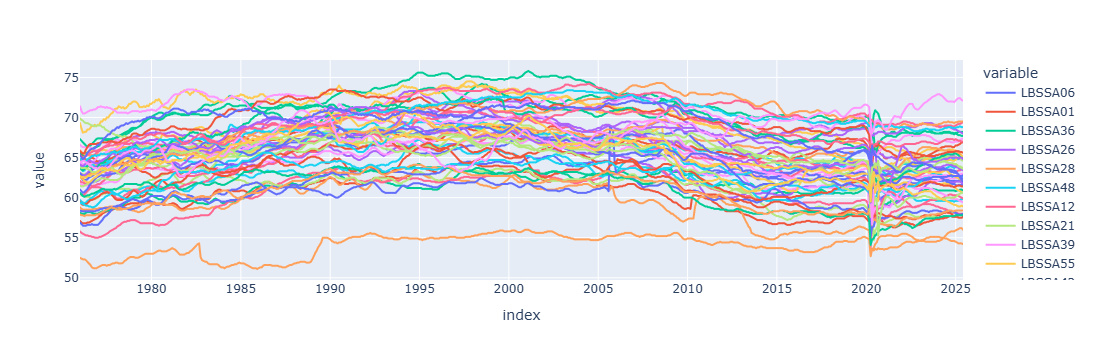

In [119]:
px.line(part_all_results)

In [118]:
type(part_all_results.index)

pandas.core.indexes.datetimes.DatetimeIndex

<Axes: >

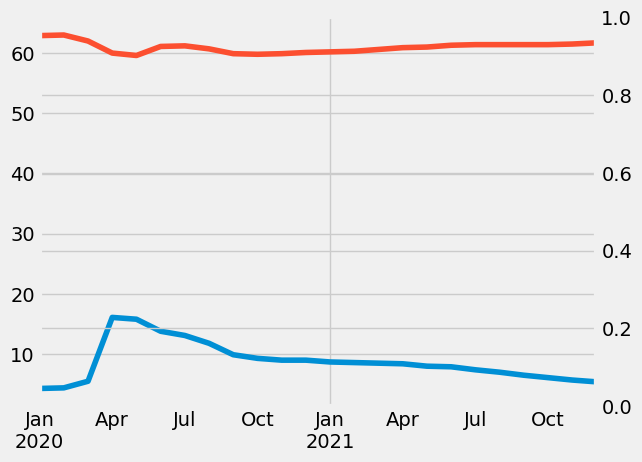

In [133]:
fig, ax=plt.subplots()
ax2=ax.twinx()
uemp_results.query('index >= 2020 and index < 2022')['  California'].plot(ax=ax)
part_all_results.query('index >= 2020 and index < 2022')['LBSSA06'].plot(ax=ax)


In [43]:
!git init


Reinitialized existing Git repository in D:/Repository/Learning/Python/.git/


In [44]:
!git branch

* master


In [45]:
!git remote -v

origin	git@github.com:markselvan/python_learning.git (fetch)
origin	git@github.com:markselvan/python_learning.git (push)


In [46]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Economic Data Analysis.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [47]:
!git add .

In [48]:
!git commit -m "added new files for learning"
!git push origin master
!git status

[master dc1d5ab] added new files for learning
 1 file changed, 34 insertions(+), 21624 deletions(-)


To github.com:markselvan/python_learning.git
   09922a5..dc1d5ab  master -> master


On branch master
nothing to commit, working tree clean
